# "Solving the Schrödinger Equation for the Hydrogen Atom: A Shooting Method Approach"

**This code is solving the Schrödinger equation for the radial part of the wave function of a hydrogen atom. The Schrödinger equation is a differential equation that describes the behavior of a quantum mechanical system, such as the hydrogen atom. The solution of this equation gives the probability distribution of the system, which is represented by the wave function.**

In [1]:
import numpy as np
from scipy.integrate import odeint, simps
from scipy.optimize import newton, bisect
from matplotlib import pyplot as plt

The first step in the code is to define a function "f", which represents the differential equation for the radial part of the wave function of a hydrogen atom. The function takes in the variables w, r, E, and l, where w is the wave function, r is the radial coordinate, E is the energy, and l is the angular momentum quantum number. The function returns the first and second derivatives of the wave function, which are used in the numerical integration.

In [2]:
def f(w,r,E,l):
    u,v = w
    f1,f2=v,(l*(l+1)/r**2-2/r-E)*u
    return [f1,f2]

The next step is to define a range of values for the radial coordinate (r) using the linspace function from numpy. The range is from a very small value to 20, with 1000 points. The range is then reversed using the [::-1] slice notation to ensure that the integration starts from a large distance and goes towards the origin. This is important because the wave function is defined as zero at infinity, so it is important to start the integration from a large distance to ensure that the wave function is zero at the beginning of the integration.

The angular momentum quantum number (l) is set to 0, which corresponds to the s-state of the hydrogen atom. An initial guess for the wave function (w) is defined as [0.0, -0.001]. A range of initial guesses for the energy (energies) is defined as -1.2/np.arange(1,20,0.2)^2, which corresponds to a range of energy values in decreasing order. The energy eigenvalues are the values that correspond to the stationary states of the system, which do not change over time.

In [3]:
r=np.linspace(1e-10,20,1000)
rr=r[::-1]
energies=-1.2/np.arange(1,20,0.2)**2
n=energies.size
l=0
w=[0.0, -0.001]

A function "shoot" is defined, which takes in a single variable E (the energy) and uses the odeint function to integrate the differential equation for the wave function using the defined range of r values, an initial guess for the wave function, and the input energy E. The function returns the value of the wave function at the origin (r=0). This is used as a boundary condition for the wave function, as the wave function is defined as zero at the origin.

In [4]:
def shoot(E):
    sol = odeint(f,w,rr,args=(E,l))
    return sol[:,0][-1]

The bisect function from scipy is then used to find the energy eigenvalues. The bisect function takes in a function and two values, and finds the value that makes the function equal to zero (in this case, the energy that makes the wave function at the origin equal to zero). The bisect function is used to find the energy eigenvalues by iterating through the range of initial guesses for the energy and calling the "shoot" function for each energy value. If the "shoot" function returns a positive value for one energy and a negative value for the next energy, the bisect function is used to find the energy that makes the "shoot" function equal to zero (the energy eigenvalue). The found energy eigenvalues are printed out.

In [5]:
u0=shoot(energies[0])
print('Energy eigenvales')
En0=0
for i in range (1,n):
    u1=shoot(energies[i])
    if u1*u0<0:
        En=bisect(shoot, energies[i-1], energies[i])
        u0=u1
        if En0 !=En: print (En, end = '\n')
        En0=En

Energy eigenvales
-1.0000000157385025
-0.24997379570895875
-0.09983340405801794


The last step is to calculate the wave function using the energy eigenvalue that is found using bisect function. The odeint function is used to solve the Schrödinger equation using the found energy and the range of r values. The wave function is then extracted from the solution, normalized, and squared. The squared wave function is plotted using matplotlib. This plot represents the probability density of the wave function.

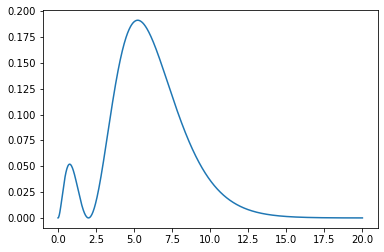

In [6]:
En=-0.24997379553154978
sol=odeint(f,w,rr,args=(En,l))
psi=sol[:,0][::-1]
norm=simps(psi**2,r)
psi*=1./np.sqrt(norm)
plt.plot(r,psi*psi)
plt.show()